In [1]:
import pandas as pd
import re

In [2]:
data = pd.read_csv('training.1600000.processed.noemoticon.csv',encoding = 'latin1', header = None, names = ['sentiment','id','date','flag','user','text'] )

In [3]:
data

,sentiment,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


## Preprocessing

In [4]:
data.shape

(1600000, 6)

In [5]:
data.isna().any()

sentiment    False
id           False
date         False
flag         False
user         False
text         False
dtype: bool

In [6]:
data['sentiment'].unique()

array([0, 4])

In [7]:
data['sentiment'].value_counts()

0    800000
4    800000
Name: sentiment, dtype: int64

<Axes: >

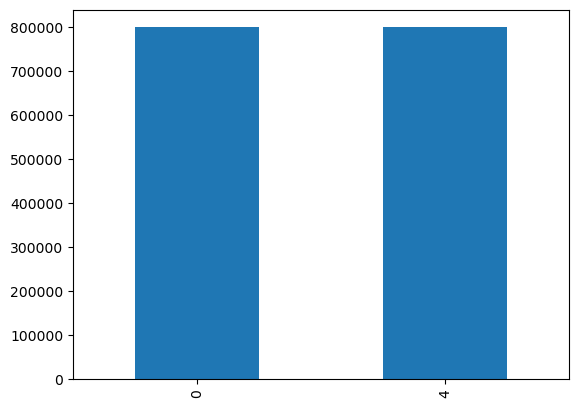

In [8]:
data['sentiment'].value_counts().plot(kind = 'bar')

In [9]:
data['sentiment'] = data['sentiment'].map({0: 'Negative', 4: 'Positive'})

In [10]:
data

,sentiment,id,date,flag,user,text
0,Negative,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,Negative,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,Negative,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,Negative,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,Negative,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1599995,Positive,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,Positive,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,Positive,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,Positive,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [11]:
def remove_urls(text):
    return re.sub(r'https?://\S+', '', text)

data['text'] = data['text'].apply(remove_urls)

In [139]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.metrics import f1_score
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to /Users/karanx/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/karanx/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/karanx/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [13]:
lemmatizer = WordNetLemmatizer()

In [14]:
def lemmatization(content):
    words = word_tokenize(re.sub('[^a-zA-Z]', ' ', content.lower()))
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words if word not in stopwords.words('english')]
    lemmatized_text = ' '.join(lemmatized_words)
    
    return lemmatized_text

In [15]:
data['filtered_data'] = data['text'].apply(lemmatization)

In [16]:
data

,sentiment,id,date,flag,user,text,filtered_data
0,Negative,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot - Awww, that's a bummer. You sho...",switchfoot awww bummer shoulda got david carr ...
1,Negative,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,upset update facebook texting might cry result...
2,Negative,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,kenichan dived many time ball managed save res...
3,Negative,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,whole body feel itchy like fire
4,Negative,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",nationwideclass behaving mad see
...,...,...,...,...,...,...,...
1599995,Positive,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...,woke school best feeling ever
1599996,Positive,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...,thewdb com cool hear old walt interview
1599997,Positive,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...,ready mojo makeover ask detail
1599998,Positive,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...,happy th birthday boo alll time tupac amaru sh...


## Prediction Model Building

In [17]:
X = data['filtered_data'].values
Y = data['sentiment'].values

In [130]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=5, test_size=0.2, stratify = Y)

In [131]:
vectorizer = TfidfVectorizer()

X_train_numeric = vectorizer.fit_transform(X_train)
X_test_numeric = vectorizer.transform(X_test)

In [20]:
print(X_test_numeric)

  (0, 397211)	0.21780062794221985
  (0, 170498)	0.36576919097907545
  (0, 162422)	0.2842959845077707
  (0, 160031)	0.13657786663559388
  (0, 158401)	0.3072877458158921
  (0, 149664)	0.3558228569015783
  (0, 147121)	0.1409329851600644
  (0, 144599)	0.17724182033572425
  (0, 131218)	0.22874428951635306
  (0, 83329)	0.19093993031712184
  (0, 74473)	0.27903352856047936
  (0, 50798)	0.3178702961759991
  (0, 45074)	0.16596261671029178
  (0, 32623)	0.12169044498586803
  (0, 29018)	0.3700678785821457
  (1, 458814)	0.30954062982295233
  (1, 446576)	0.32193886730916726
  (1, 396557)	0.27171547149280095
  (1, 302374)	0.35267196679476226
  (1, 287432)	0.2080333055286041
  (1, 249719)	0.18280256862459945
  (1, 153473)	0.42739037204045327
  (1, 152999)	0.3901923574467273
  (1, 87108)	0.3417466798622502
  (1, 30802)	0.27191012516743024
  :	:
  (319997, 158479)	0.10919478291825199
  (319997, 135876)	0.26370973626449445
  (319997, 135875)	0.3124034123456494
  (319997, 85913)	0.33541688526521607
  (3199

In [132]:
lr = LogisticRegression(max_iter=1000)

In [133]:
lr.fit(X_train_numeric, Y_train)

LogisticRegression(max_iter=1000)

In [134]:
y_pred = lr.predict(X_test_numeric)

In [135]:
result = pd.DataFrame({'Predicted Sentiment': y_pred, 'True Sentiment': Y_test})
result

,Predicted Sentiment,True Sentiment
0,Negative,Positive
1,Positive,Negative
2,Positive,Positive
3,Positive,Positive
4,Negative,Negative
...,...,...
319995,Negative,Negative
319996,Negative,Positive
319997,Positive,Positive
319998,Negative,Negative


In [136]:
metrics.accuracy_score(Y_test, y_pred)

0.779321875

In [143]:
f1 = f1_score(Y_test, y_pred, pos_label='Positive')

print("F1 Score:", f1)

F1 Score: 0.7837608591140004


In [144]:
f1 = f1_score(Y_test, y_pred, pos_label='Negative')

print("F1 Score:", f1)

F1 Score: 0.7746968232242503


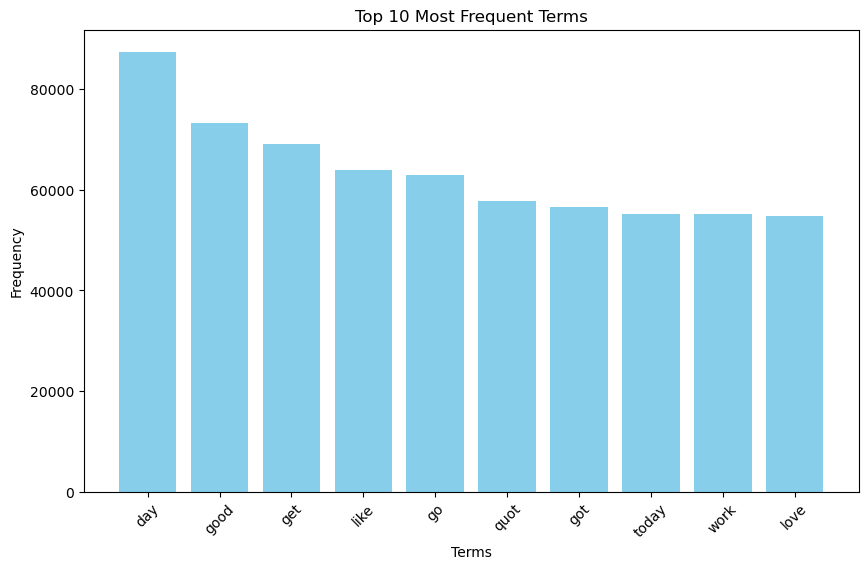

In [26]:

count_vectorizer = CountVectorizer()

X_train_counts = vectorizer.fit_transform(X_train)
X_test_counts = vectorizer.transform(X_test)
term_frequencies = np.asarray(X_train_counts.sum(axis=0)).reshape(-1)
feature_names = vectorizer.get_feature_names_out()
term_freq_dict = dict(zip(feature_names, term_frequencies))
sorted_terms = sorted(term_freq_dict.items(), key=lambda x: x[1], reverse=True)
top_terms = dict(sorted_terms[:top_n])
plt.figure(figsize=(10, 6))
plt.bar(top_terms.keys(), top_terms.values(), color='skyblue')
plt.xlabel('Terms')
plt.ylabel('Frequency')
plt.title('Top {} Most Frequent Terms'.format(top_n))
plt.xticks(rotation=45)
plt.show()

In [29]:
pip install wordcloud

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.6/172.6 kB 3.8 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


(-0.5, 799.5, 399.5, -0.5)

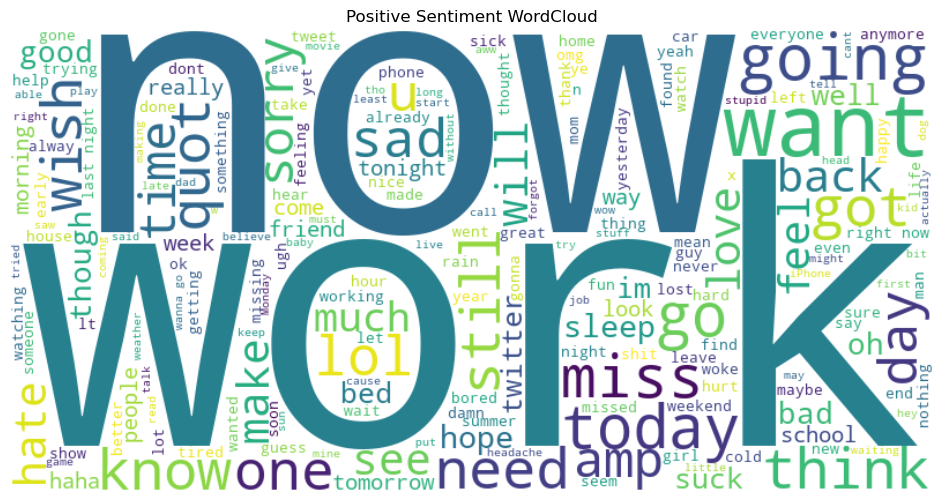

In [42]:
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(data[data.sentiment == 'Negative'].text))

negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(data[data.sentiment == 'Positive'].text))

plt.figure(figsize=(15, 6))
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Positive Sentiment WordCloud')
plt.axis('off')

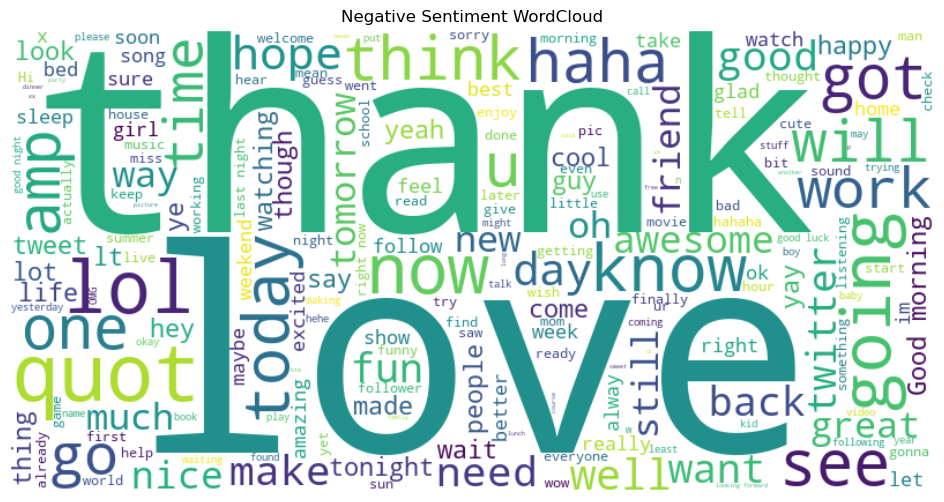

In [41]:
plt.figure(figsize=(15, 6))
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Negative Sentiment WordCloud')
plt.axis('off')

plt.show()

## Temporal Analysis

In [51]:
data1 = data.copy()
data1

,sentiment,id,date,flag,user,text,filtered_data
0,Negative,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot - Awww, that's a bummer. You sho...",switchfoot awww bummer shoulda got david carr ...
1,Negative,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,upset update facebook texting might cry result...
2,Negative,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,kenichan dived many time ball managed save res...
3,Negative,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,whole body feel itchy like fire
4,Negative,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",nationwideclass behaving mad see
...,...,...,...,...,...,...,...
1599995,Positive,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...,woke school best feeling ever
1599996,Positive,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...,thewdb com cool hear old walt interview
1599997,Positive,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...,ready mojo makeover ask detail
1599998,Positive,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...,happy th birthday boo alll time tupac amaru sh...


In [52]:
data1['date'] = data1['date'].str.replace(r'\bPDT\b', '')

data1['date'] = pd.to_datetime(data1['date'], format='%a %b %d %H:%M:%S %Y')

data1['day'] = data1['date'].dt.day
data1['month'] = data1['date'].dt.month
data1['year'] = data1['date'].dt.year['hour'] = data1['date'].dt.hour
data1['minute'] = data1['date'].dt.minute
data1['second'] = data1['date'].dt.second


/var/folders/jl/vb19m_b13k38jb1_prkhrmth0000gn/T/ipykernel_18131/1826192996.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data1['date'] = data1['date'].str.replace(r'\bPDT\b', '')


        sentiment          id                date      flag             user  \
0        Negative  1467810369 2009-04-06 22:19:45  NO_QUERY  _TheSpecialOne_   
1        Negative  1467810672 2009-04-06 22:19:49  NO_QUERY    scotthamilton   
2        Negative  1467810917 2009-04-06 22:19:53  NO_QUERY         mattycus   
3        Negative  1467811184 2009-04-06 22:19:57  NO_QUERY          ElleCTF   
4        Negative  1467811193 2009-04-06 22:19:57  NO_QUERY           Karoli   
...           ...         ...                 ...       ...              ...   
1599995  Positive  2193601966 2009-06-16 08:40:49  NO_QUERY  AmandaMarie1028   
1599996  Positive  2193601969 2009-06-16 08:40:49  NO_QUERY      TheWDBoards   
1599997  Positive  2193601991 2009-06-16 08:40:49  NO_QUERY           bpbabe   
1599998  Positive  2193602064 2009-06-16 08:40:49  NO_QUERY     tinydiamondz   
1599999  Positive  2193602129 2009-06-16 08:40:50  NO_QUERY   RyanTrevMorris   

                                       

In [53]:
data1

,sentiment,id,date,flag,user,text,filtered_data,day,month,year,hour,minute,second
0,Negative,1467810369,2009-04-06 22:19:45,NO_QUERY,_TheSpecialOne_,"@switchfoot - Awww, that's a bummer. You sho...",switchfoot awww bummer shoulda got david carr ...,6,4,2009,22,19,45
1,Negative,1467810672,2009-04-06 22:19:49,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,upset update facebook texting might cry result...,6,4,2009,22,19,49
2,Negative,1467810917,2009-04-06 22:19:53,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,kenichan dived many time ball managed save res...,6,4,2009,22,19,53
3,Negative,1467811184,2009-04-06 22:19:57,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,whole body feel itchy like fire,6,4,2009,22,19,57
4,Negative,1467811193,2009-04-06 22:19:57,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",nationwideclass behaving mad see,6,4,2009,22,19,57
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1599995,Positive,2193601966,2009-06-16 08:40:49,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...,woke school best feeling ever,16,6,2009,8,40,49
1599996,Positive,2193601969,2009-06-16 08:40:49,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...,thewdb com cool hear old walt interview,16,6,2009,8,40,49
1599997,Positive,2193601991,2009-06-16 08:40:49,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...,ready mojo makeover ask detail,16,6,2009,8,40,49
1599998,Positive,2193602064,2009-06-16 08:40:49,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...,happy th birthday boo alll time tupac amaru sh...,16,6,2009,8,40,49


In [57]:
data1['hour'].unique()

array([22, 23,  0,  1,  2,  3,  4,  5,  6,  7,  8, 20, 21,  9, 10, 13, 14,
       15, 16, 17, 11, 12, 19, 18])

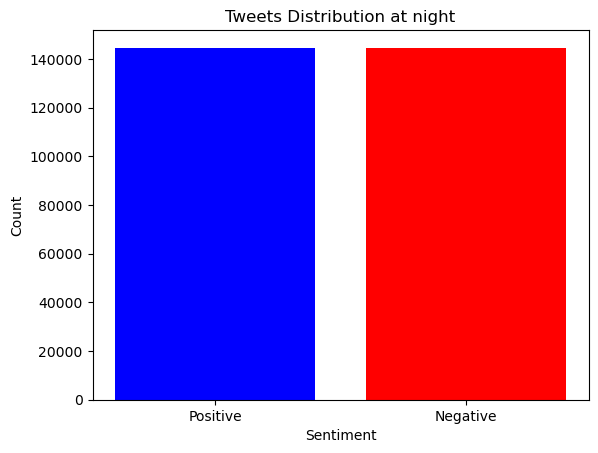

Number of tweets at night:  289101


In [88]:
night = data1.query("20 <= hour <= 23")
positive_count = (night['sentiment'] == 'Positive').sum()
negative_count = (night['sentiment'] == 'Negative').sum()
sentiments = ['Positive', 'Negative']
counts = [positive_count, negative_count]
plt.bar(sentiments, counts, color=['blue', 'red'])
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Tweets Distribution at night')
plt.show()

night_count = len(night)
print('Number of tweets at night: ',night_count)

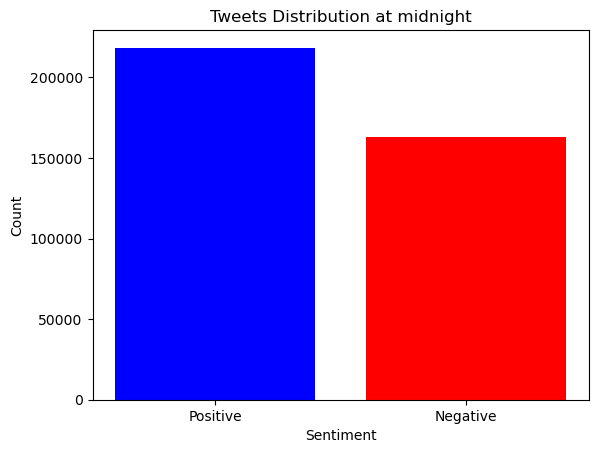

Number of tweets at midnight:  381372


In [89]:
midnight = data1.query("0 <= hour <= 4")
positive_count = (midnight['sentiment'] == 'Positive').sum()
negative_count = (midnight['sentiment'] == 'Negative').sum()
sentiments = ['Positive', 'Negative']
counts = [positive_count, negative_count]
plt.bar(sentiments, counts, color=['blue', 'red'])
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Tweets Distribution at midnight')
plt.show()

midnight_count = len(midnight)
print('Number of tweets at midnight: ',midnight_count)

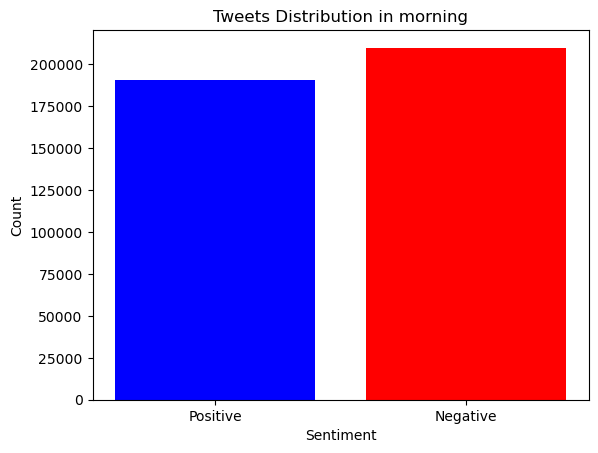

Number of tweets at morning:  400570


In [94]:
morn = data1.query("7 <= hour <= 12")
positive_count = (morn['sentiment'] == 'Positive').sum()
negative_count = (morn['sentiment'] == 'Negative').sum()
sentiments = ['Positive', 'Negative']
counts = [positive_count, negative_count]
plt.bar(sentiments, counts, color=['blue', 'red'])
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Tweets Distribution in morning')
plt.show()

morn_count = len(morn)
print('Number of tweets at morning: ',morn_count)

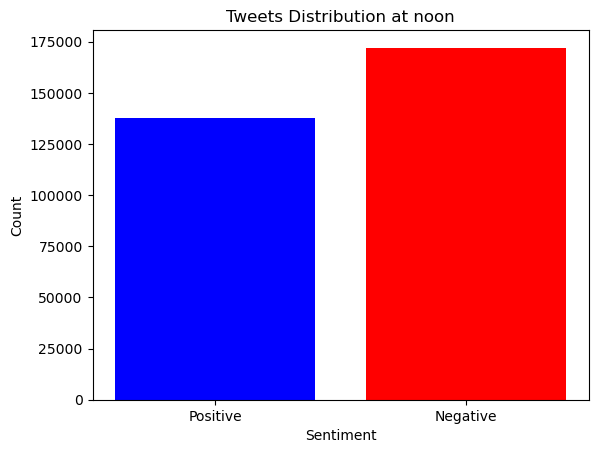

Number of tweets at noon:  309928


In [137]:
noon = data1.query("12 <= hour <= 17")
positive_count = (noon['sentiment'] == 'Positive').sum()
negative_count = (noon['sentiment'] == 'Negative').sum()
sentiments = ['Positive', 'Negative']
counts = [positive_count, negative_count]
plt.bar(sentiments, counts, color=['blue', 'red'])
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Tweets Distribution at noon')
plt.show()

noon_count = len(noon)
print('Number of tweets at noon: ',noon_count)

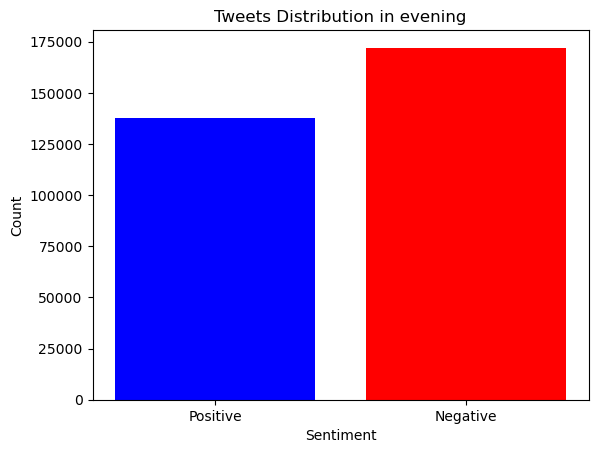

Number of tweets in evening:  309928


In [138]:
eve = data1.query("17 <= hour <= 20")
positive_count = (noon['sentiment'] == 'Positive').sum()
negative_count = (noon['sentiment'] == 'Negative').sum()
sentiments = ['Positive', 'Negative']
counts = [positive_count, negative_count]
plt.bar(sentiments, counts, color=['blue', 'red'])
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Tweets Distribution in evening')
plt.show()

eve_count = len(noon)
print('Number of tweets in evening: ',eve_count)

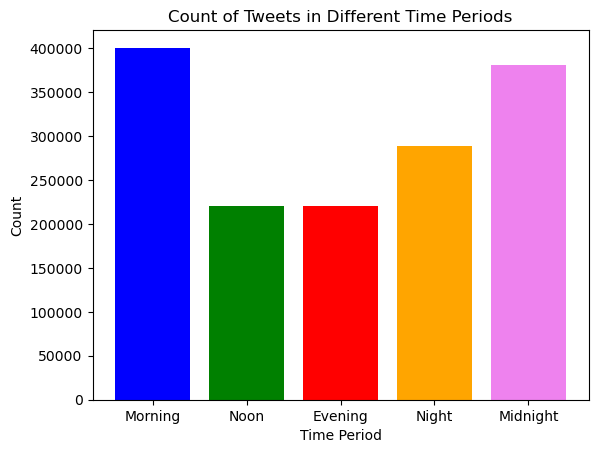

In [101]:
counts = [morn_count, noon_count,eve_count, night_count, midnight_count]
time_periods = ['Morning', 'Noon', 'Evening','Night','Midnight']

plt.bar(time_periods, counts, color=['blue', 'green', 'red','orange','violet'])
plt.xlabel('Time Period')
plt.ylabel('Count')
plt.title('Count of Tweets in Different Time Periods')
plt.show()

In [116]:
def predict_sentiment(input_words):
    preprocessed_words = lemmatization(input_words)
    vectorized_input = vectorizer.transform([preprocessed_words])
    predictions = lr.predict(vectorized_input)
    if predictions[0] == 'Positive':
        return "Positive"
    else:
        return "Negative"

input_words = input("Enter your text: ") 
predicted_sentiment = predict_sentiment(input_words)
print("Predicted sentiment:", predicted_sentiment)

Enter your text:  I loved the movie it was amazing!


Predicted sentiment: Positive


In [126]:
import joblib


joblib.dump(lr, 'logistic_regression_model.joblib')
joblib.dump(vectorizer, 'tfidf_vectorizer.joblib')

['tfidf_vectorizer.joblib']

In [127]:
lr_model = joblib.load("logistic_regression_model.joblib")
tfidf_vectorizer = joblib.load("tfidf_vectorizer.joblib")

In [119]:
import streamlit as st
st.title("Sentiment Analysis")

input_text = st.text_input("Enter text or URL:")
if st.button("Predict"):
    predicted_sentiment = predict_sentiment(input_text)
    st.write("Predicted sentiment:", predicted_sentiment)

2024-02-21 15:31:50.914 
  command:

    streamlit run /Users/karanx/anaconda3/lib/python3.10/site-packages/ipykernel_launcher.py [ARGUMENTS]
